In [157]:
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from options import all_options

import plotly.express as px
import plotly.graph_objects as go

from dash.exceptions import PreventUpdate

from layouts import info, get_info, get_info_home, info_home

from app import app

import dash_leaflet as dl
import dash_leaflet.express as dlx
import calendar
import pandas as pd

from options import tubewell_options,df, df_dptw,df_both, st_location_options, dt_location_options,swt_geojson,dwt_geojson,both_geojson,swt_geojson_bk,dwt_geojson_bk,both_geojson_bk,\
    swt_geojson_ba,dwt_geojson_ba,both_geojson_ba,modify_df,df_data , both_options, years, stw_district_wells, dtw_district_wells, all_wells,all_wells_t

# from data_import import download_data, map_data, save_file, parse_contents,\
#      offline_data_transform, offline_df,cols_rename
from data_import import download_data, map_data, save_file, parse_contents

import os


In [158]:
offline_rohini = pd.read_csv('rohini_khola_2021.csv')
offline_bgau = pd.read_csv('banjare_gau_2021.csv')
offline_channawa = pd.read_csv('channawa_2021.csv')
offline_dgau = pd.read_csv('d_gau_2021.csv')
offline_jaispur = pd.read_csv('jaispur_2021.csv')
offline_kalhanshangau = pd.read_csv('kalhanshgau_2021.csv')
offline_khadaicha = pd.read_csv('khadaicha_2021.csv')
offline_piprahawa = pd.read_csv('piprahawa_2021.csv')
offline_shikanpurwa = pd.read_csv('shikanpurwa_2021.csv')
# print(f"{offline_rohini.columns}-------------------->")
offline_df = [offline_rohini, offline_bgau, offline_channawa, offline_dgau, offline_jaispur, offline_kalhanshangau, offline_khadaicha, offline_piprahawa, offline_shikanpurwa]
cols_rename = ['Index','SN','Date','Abs Pres (KPa)','Temp(°C)','Water Level(meters)']
location_column_offline = ['Rohini Khola','Banjare Gau', 'Channawa','D-Gau','Jaispur','Kalhanshangau','Khadaicha','Piprahawa','Shikanpurwa']
all_offline_data = {}

In [159]:
all_offline_data

{}

In [160]:
for i in range(len(offline_df)):
            offline_df[i] = offline_df[i].iloc[:,:6]
            offline_df[i].columns = cols_rename
            offline_df[i]['Water Level(meters)'] = abs(offline_df[i]['Water Level(meters)'])
            offline_df[i]['Date'] = pd.to_datetime(offline_df[i]['Date'])
            offline_df[i]['Month'] = offline_df[i]['Date'].dt.month
            offline_df[i]['Month'] = offline_df[i]['Month'].apply(lambda x: calendar.month_abbr[x])
            # print(offline_df[i])
            offline_df[i]['Location'] = location_column_offline[i]
         #   offline_df[i] = offline_df[i].groupby(['Location','Month'], as_index=False)['Water Level(meters)'].mean().reset_index()
            all_offline_data[i] = offline_df[i]

In [161]:
offline_df

[   Index  SN                Date  Abs Pres (KPa)  Temp(°C)  \
 0      0   1 2021-02-08 17:00:00         129.997    24.931   
 1      1   2 2021-02-09 05:00:00         129.822    24.931   
 2      2   3 2021-02-09 17:00:00         129.754    24.835   
 3      3   4 2021-02-10 05:00:00         129.649    24.835   
 4      4   5 2021-02-10 17:00:00         129.614    24.835   
 5      5   6 2021-02-11 05:00:00         129.579    24.835   
 6      6   7 2021-02-11 17:00:00         129.474    24.835   
 7      7   8 2021-02-12 05:00:00         129.684    24.835   
 
    Water Level(meters) Month      Location  
 0                3.360   Feb  Rohini Khola  
 1                3.378   Feb  Rohini Khola  
 2                3.385   Feb  Rohini Khola  
 3                3.395   Feb  Rohini Khola  
 4                3.399   Feb  Rohini Khola  
 5                3.403   Feb  Rohini Khola  
 6                3.413   Feb  Rohini Khola  
 7                3.392   Feb  Rohini Khola  ,
    Index  SN   

In [162]:
all_off_logger_df = pd.concat([all_offline_data[0],all_offline_data[1],all_offline_data[2],all_offline_data[3],
                               all_offline_data[4],all_offline_data[5],all_offline_data[6],all_offline_data[7],all_offline_data[8]])

In [165]:
location = df_both['Location'].tolist()
location

['Rohini Khola',
 'Jabdhawa',
 'Banktuwa',
 'Channawa',
 'Thapawa',
 'Piprahwa',
 'Bhujai',
 'Birta',
 'Sikhanpurwa',
 'Kharaicha',
 'Jaishpur',
 'D-gaon',
 'Kalhansgaon',
 'Gaughat',
 'Mahadevpuri',
 'Office compound',
 'Kajurakurda',
 'Banjaregaon',
 'Ramapurwa',
 'Jaogagaun',
 'Baldipurwa',
 'Harbaldoli',
 'Bertani',
 'Bakharikurd',
 'Mainapokhar',
 'Bangai',
 'Bhaisahi',
 'Rain Nagar',
 'Megara Gadhi',
 'Auri',
 'Khairapur',
 'Padnaha',
 'Baniyabhar',
 'Taratal',
 'Madhubhan',
 'Begnaha',
 'Bhurigaon',
 'Newlpur',
 'Thakurdwaar',
 'Shoharawa',
 'Bhawanipur',
 'Shoharawa',
 'Belwa',
 'Belwa',
 'Janaki Tool',
 'K Gaon',
 'L Gaon',
 'Gaughat',
 'Gaughat',
 'Parspur',
 'Shantipur',
 'Tholodafe',
 'Shantipur',
 'Shantipur']

In [163]:
all_off_logger_df[(all_off_logger_df.Location == "Rohini Khola")]

,Index,SN,Date,Abs Pres (KPa),Temp(°C),Water Level(meters),Month,Location
0,0,1,2021-02-08 17:00:00,129.997,24.931,3.360,Feb,Rohini Khola
1,1,2,2021-02-09 05:00:00,129.822,24.931,3.378,Feb,Rohini Khola
2,2,3,2021-02-09 17:00:00,129.754,24.835,3.385,Feb,Rohini Khola
3,3,4,2021-02-10 05:00:00,129.649,24.835,3.395,Feb,Rohini Khola
4,4,5,2021-02-10 17:00:00,129.614,24.835,3.399,Feb,Rohini Khola
5,5,6,2021-02-11 05:00:00,129.579,24.835,3.403,Feb,Rohini Khola
6,6,7,2021-02-11 17:00:00,129.474,24.835,3.413,Feb,Rohini Khola
7,7,8,2021-02-12 05:00:00,129.684,24.835,3.392,Feb,Rohini Khola


In [138]:
df = pd.read_csv('updated_data.csv')
df[(df.well_no == "bk-sw-01")]


,Unnamed: 0,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,measurement_point_cm,Measurement_of_tape_ent_point_MP_in_m,wet_point_measruement_on_tape,gw_level,Notes,today,Audio_Notes,well_no,Month
13,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,20,3.6,1.20,2.20,NaN,2021-01-27,Test,bk-sw-01,Jan
31,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.85,2.95,NaN,2021-02-01,NaN,bk-sw-01,Feb
94,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.50,3.30,NaN,2021-02-28,NaN,bk-sw-01,Feb
116,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.34,3.46,NaN,2021-04-02,NaN,bk-sw-01,Apr


0      bk-sw-09_1
1        bk-sw-29
2      bk-sw-11_1
3        bk-sw-26
4      bk-sw-17_1
          ...    
147      bd-sw-12
148      bd-sw-13
149      bd-sw-15
150      bd-sw-14
151      bd-sw-16
Name: sw_bk_well_no, Length: 152, dtype: object

In [139]:
df['well_no'] = (df['sw_bk_well_no'].combine_first(df['bk_dw_no']).combine_first(df['well_no_sw_bardiya']).combine_first(df['well_no_dw_bardiya']))
df[(df.well_no == "bk-sw-01")]


,Unnamed: 0,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,measurement_point_cm,Measurement_of_tape_ent_point_MP_in_m,wet_point_measruement_on_tape,gw_level,Notes,today,Audio_Notes,well_no,Month
13,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,20,3.6,1.20,2.20,NaN,2021-01-27,Test,bk-sw-01,Jan
31,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.85,2.95,NaN,2021-02-01,NaN,bk-sw-01,Feb
94,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.50,3.30,NaN,2021-02-28,NaN,bk-sw-01,Feb
116,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.0,1.34,3.46,NaN,2021-04-02,NaN,bk-sw-01,Apr


In [140]:
df_location_stw = pd.read_excel('data/preloaded_data/updated_well_data.xlsx')
df_location_dtw = pd.read_excel('data/preloaded_data/updated_well_data.xlsx', sheet_name= "Deep tube wells")
df_location =  pd.concat([df_location_stw, df_location_dtw])

In [141]:
df_new = pd.merge(df, df_location, on='well_no', how = 'inner')      
df_new.to_csv('offline_logger_data.csv')
        

In [142]:
df_new[(df_new.well_no == "bk-sw-01")]


,Unnamed: 0,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,measurement_point_cm,...,today,Audio_Notes,well_no,Month,S.No.,Well No.,Location,Longitude,Latitude,district
21,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,20,...,2021-01-27,Test,bk-sw-01,Jan,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
22,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,...,2021-02-01,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
23,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,...,2021-02-28,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
24,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,...,2021-04-02,NaN,bk-sw-01,Apr,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke


In [127]:
df_odk_data = pd.read_csv('offline_logger_data.csv')
df_offline_logger = all_off_logger_df

In [128]:
df_offline_logger[(df_offline_logger.Location == "Rohini Khola")]

,Index,SN,Date,Abs Pres (KPa),Temp(°C),Water Level(meters),Month,Location
0,0,1,2021-02-08 17:00:00,129.997,24.931,3.360,Feb,Rohini Khola
1,1,2,2021-02-09 05:00:00,129.822,24.931,3.378,Feb,Rohini Khola
2,2,3,2021-02-09 17:00:00,129.754,24.835,3.385,Feb,Rohini Khola
3,3,4,2021-02-10 05:00:00,129.649,24.835,3.395,Feb,Rohini Khola
4,4,5,2021-02-10 17:00:00,129.614,24.835,3.399,Feb,Rohini Khola
5,5,6,2021-02-11 05:00:00,129.579,24.835,3.403,Feb,Rohini Khola
6,6,7,2021-02-11 17:00:00,129.474,24.835,3.413,Feb,Rohini Khola
7,7,8,2021-02-12 05:00:00,129.684,24.835,3.392,Feb,Rohini Khola
8,8,9,2021-02-12 12:06:00,NaN,NaN,NaN,Feb,Rohini Khola
9,9,10,2021-02-12 12:06:00,NaN,NaN,NaN,Feb,Rohini Khola


In [124]:
df_odk_data[(df_odk_data.Location == "Rohini Khola")]

,Unnamed: 0,Unnamed: 0.1,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,...,today,Audio_Notes,well_no,Month,S.No.,Well No.,Location,Longitude,Latitude,district
21,21,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,...,2021-01-27,Test,bk-sw-01,Jan,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
22,22,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,2021-02-01,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
23,23,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,2021-02-28,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke
24,24,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,2021-04-02,NaN,bk-sw-01,Apr,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke


In [76]:
df_offline = df_offline_logger[df_offline_logger['Location'].isin(data_logger_value)]
df_odk = df_odk_data[df_odk_data['Location'].isin(wells_dropdown_value)]
df_odk['ODK'] = 'ODK'

NameError: name 'data_logger_value' is not defined

In [109]:
df_odk = df_odk_data[df_odk_data['Location'].isin(["Rohini Khola","D-gaon"])]
df_odk['ODK'] = 'ODK'

<ipython-input-109-ac0cf44d341d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
df_odk

,Unnamed: 0,Unnamed: 0.1,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,...,Audio_Notes,well_no,Month,S.No.,Well No.,Location,Longitude,Latitude,district,ODK
12,12,4,yogendral,28.1287297 81.5894124 88.46230121420037 4.854,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Feb,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
13,13,16,yogendra,28.1287151 81.5894281 88.0 4.551,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Jan,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
14,14,123,yogendra,28.1287337 81.5893729 87.98446775075215 4.551,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Apr,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
21,21,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,...,Test,bk-sw-01,Jan,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
22,22,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
23,23,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
24,24,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Apr,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK


In [110]:
data = []  
count = 0
names = []
frame = df_odk

In [111]:
frame

,Unnamed: 0,Unnamed: 0.1,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,...,Audio_Notes,well_no,Month,S.No.,Well No.,Location,Longitude,Latitude,district,ODK
12,12,4,yogendral,28.1287297 81.5894124 88.46230121420037 4.854,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Feb,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
13,13,16,yogendra,28.1287151 81.5894281 88.0 4.551,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Jan,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
14,14,123,yogendra,28.1287337 81.5893729 87.98446775075215 4.551,Banke,sw,bk-sw-17_1,NaN,NaN,NaN,...,NaN,bk-sw-17_1,Apr,17,1-045/46(BK)17,D-gaon,81.589428,28.128715,Banke,ODK
21,21,13,Subash,28.0804943 81.6419293 114.0 13.349,Banke,sw,bk-sw-01,NaN,1611723819300..amr,NaN,...,Test,bk-sw-01,Jan,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
22,22,31,yogendra,28.1960977 81.7117444 107.0 4.551,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
23,23,94,yogendra,28.1961034 81.711776 118.65058920259087 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Feb,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK
24,24,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,...,NaN,bk-sw-01,Apr,1,1-045/46(BK)1,Rohini Khola,81.641929,28.080494,Banke,ODK


In [112]:
frame.rename(columns = {'Water Level(meters)':'gw_level'}, inplace = True)     

/home/au/miniconda3/envs/analytics/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
        # data.append(frame['gw_level'])
            # print(len(data))
        #     df_odk = df_odk.sort_values(by=['today'])
        #     df_of = df_of.sort_values(by=['Date'])
frame = frame.sort_values(by=['today'])

In [118]:
# print(frame)
groups_odk = frame.groupby(by='Location')
groups_odk
frame.groupby(by='Location')

In [116]:
df["Month"] = pd.to_datetime(df.Month, format='%b', errors='coerce').dt.month
df = df.sort_values(by=['Month'])
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [121]:
df

,Unnamed: 0,Enumerator Name,Geo_location,District,well_type,sw_bk_well_no,bk_dw_no,well_no_sw_bardiya,well_no_dw_bardiya,measurement_point_cm,Measurement_of_tape_ent_point_MP_in_m,wet_point_measruement_on_tape,gw_level,Notes,today,Audio_Notes,well_no,Month
42,42,A,28.1055899 81.4825913 79.0 4.551,Bardiya,dt,NaN,NaN,NaN,bd-dw-02,10,15.00,4.50,10.40,NaN,2021-01-28,NaN,bd-dw-02,Jan
43,43,A,28.0828531 81.5111708 89.0 4.551,Bardiya,dt,NaN,NaN,NaN,bd-dw-04,24,13.00,3.20,9.56,NaN,2021-01-28,NaN,bd-dw-04,Jan
41,41,A,28.0883406 81.502631 89.0 4.854,Bardiya,dt,NaN,NaN,NaN,bd-dw-03,20,13.00,1.20,11.60,NaN,2021-01-28,NaN,bd-dw-03,Jan
40,40,Anita,28.085181 81.5163616 83.0 4.803,Bardiya,dt,NaN,NaN,1611818785404.amr,bd-dw-01,25,13.00,1.00,11.75,NaN,2021-01-28,NaN,1611818785404.amr,Jan
29,29,yogendra,28.0020439 81.6523786 69.0 4.551,Banke,sw,bk-sw-29,NaN,NaN,NaN,40,6.00,1.70,3.90,NaN,2021-01-31,NaN,bk-sw-29,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,yogendra,28.1465581 81.5519536 103.6786630334175 4.551,Banke,sw,bk-sw-18_1,NaN,NaN,NaN,27,5.00,1.08,3.65,NaN,2021-04-03,NaN,bk-sw-18_1,Apr
125,125,yogendra,28.1317973 81.6588377 98.44866010861558 4.803,Banke,sw,bk-sw-06_1,NaN,NaN,NaN,45,5.00,2.26,2.29,NaN,2021-04-04,NaN,bk-sw-06_1,Apr
126,126,yogendra,28.0928489 81.6478628 94.33627246343464 4.854,Banke,sw,bk-sw-07_1,NaN,NaN,NaN,15,4.95,0.50,4.30,NaN,2021-04-04,NaN,bk-sw-07_1,Apr
116,116,yogendra,28.1960804 81.7117424 127.62967228481328 4.854,Banke,sw,bk-sw-01,NaN,NaN,NaN,20,5.00,1.34,3.46,NaN,2021-04-02,NaN,bk-sw-01,Apr


In [119]:
go.Scatter(x=df['Month'].tolist(), 
    y=df['gw_level'].tolist(),
    name="Rohini Khola_odk")
    

Scatter({
    'name': 'Rohini Khola_odk',
    'x': [Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan,
          Jan, Jan, Jan, Jan, Jan, Jan, Jan, Jan, Feb, Feb, Feb, Feb, Feb, Feb,
          Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb,
          Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb,
          Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb,
          Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar,
          Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar,
          Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Mar, Apr, Apr, Apr, Apr, Apr,
          Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr,
          Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr,
          Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr],
    'y': [10.4, 9.56, 11.6, 11.75, 3.9, 2.15, 4.15, 4.3, 2.75, 3.9, 2.0, 6.1,
         

In [101]:
                data.append(trace)

     

NameError: name 'trace' is not defined

In [79]:
               
frame = df_offline

            frame = frame.sort_values(by=['Month'])
            groups_offline = frame.groupby(by='Location')
            for group, df in groups_offline:
                    df["Month"] = pd.to_datetime(df.Month, format='%b', errors='coerce').dt.month
                    df = df.sort_values(by=['Month'])
                    df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

                    # print(df)
                    trace_1 = go.Scatter(x=df['Month'].tolist(), 
                       y=df['gw_level'].tolist(),
                       name=group)
                    data.append(trace_1)

In [82]:
df_offline

,index,Location,Month,gw_level


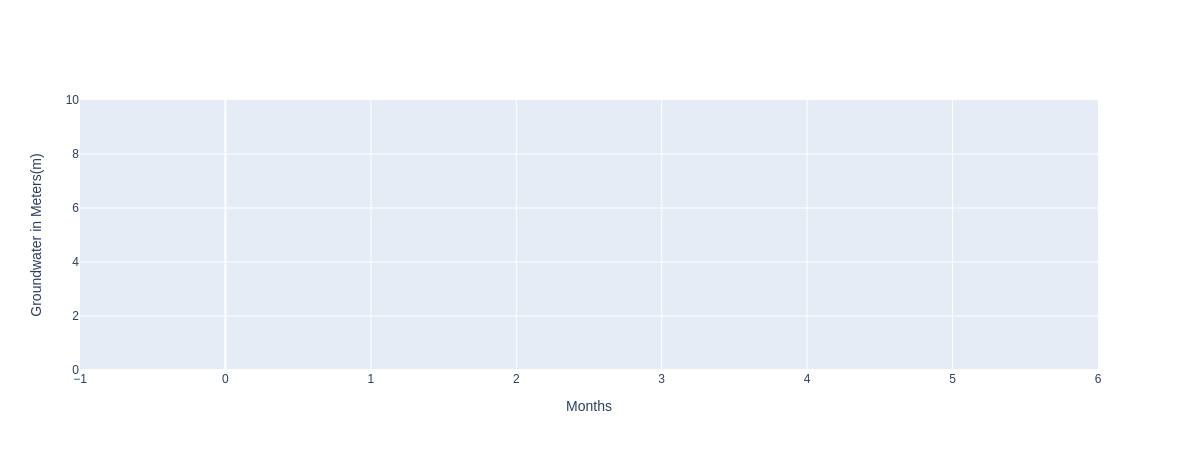

In [47]:
layout =  go.Layout(xaxis={'title': 'Months'},
                    yaxis={'title': 'Groundwater in Meters(m)'},
                    hovermode='closest')
figure = go.Figure(data=data, layout=layout)  
figure.update_yaxes(autorange="reversed",range=(0, 10))

In [ ]:
data

In [226]:
df_data = pd.read_csv('data/preloaded_data/all_wells_clean_tall.csv')
df_data

,Unnamed: 0,serial number,Well number,well_no,longitude,latitude,location,Well type,remarks,year,month,value
0,257,1.0,1-045/46(BK)1,bk-sw-01,569500.00000,3.119130e+06,Rohini_Khola,Shallow well,NaN,2001,Jan,3.19
1,258,2.0,2-045/46(BK)2,bk-sw-02,569500.00000,3.125700e+06,Jabadhawa,Shallow well,Pump fitted,2001,Jan,3.87
2,259,3.0,3-045/46(BK)3,bk-sw-03,563125.00000,3.125750e+06,Banktuwa,Shallow well,NaN,2001,Jan,2.1
3,260,4.0,4-045/46(BK)4,bk-sw-04,561300.00000,3.119200e+06,Channawa,Shallow well,NaN,2001,Jan,NaN
4,261,5.0,5-045/46(BK)5,bk-sw-05_1,557300.00000,3.118750e+06,Thapawa,Shallow well,Fllowing,2001,Jan,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4241,1.0,SP-1,bk-dw-01,81.60245,2.805131e+01,K_Gaon,Deep well,NaN,2015,Dec,NaN
4496,4242,2.0,SP-6,bk-dw-02,81.54661,2.808181e+01,L_Gaon,Deep well,NaN,2015,Dec,NaN
4497,4243,3.0,SP-9,bk-dw-03,81.51668,2.812222e+01,GaughatDW1,Deep well,NaN,2015,Dec,NaN
4498,4244,4.0,SP-13,bk-dw-04_1,81.51731,2.811321e+01,GaughatDW2,Deep well,NaN,2015,Dec,NaN


In [227]:
wells = "bk-sw-01"
data = df_data[df_data['well_no'].isin(["bk-sw-01"])]
data       
       

,Unnamed: 0,serial number,Well number,well_no,longitude,latitude,location,Well type,remarks,year,month,value
0,257,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Jan,3.19
27,632,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Feb,5.2
54,1007,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Mar,5.3
81,1382,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Apr,5.34
108,1757,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,May,6.98
...,...,...,...,...,...,...,...,...,...,...,...,...
4380,2722,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Aug,0.9
4404,3097,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Sep,1.95
4428,3472,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Oct,2.15
4452,3847,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Nov,NaN


In [228]:
location = df_both['Location'].tolist()
well_no = df_both['well_no'].tolist()
title_wells = {}
        # for i, j in zip(location, well_no):
        #     title_wells = {i,j}
        # print(title_wells)
title_wells =  {j:i for i,j in zip(location,well_no)}
title = (title_wells[wells])

In [229]:
data['value'] = data['value'].apply(pd.to_numeric)
data['value'].apply(pd.to_numeric)

<ipython-input-229-4f2ae261a920>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       3.19
27      5.20
54      5.30
81      5.34
108     6.98
        ... 
4380    0.90
4404    1.95
4428    2.15
4452     NaN
4476     NaN
Name: value, Length: 156, dtype: float64

In [230]:
pd.to_datetime(data.month, format='%b', errors='coerce').dt.month

0        1
27       2
54       3
81       4
108      5
        ..
4380     8
4404     9
4428    10
4452    11
4476    12
Name: month, Length: 156, dtype: int64

In [231]:
#data.month = pd.to_datetime(data.month, format='%b', errors='coerce').dt.month
data

,Unnamed: 0,serial number,Well number,well_no,longitude,latitude,location,Well type,remarks,year,month,value
0,257,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Jan,3.19
27,632,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Feb,5.20
54,1007,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Mar,5.30
81,1382,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,Apr,5.34
108,1757,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2001,May,6.98
...,...,...,...,...,...,...,...,...,...,...,...,...
4380,2722,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Aug,0.90
4404,3097,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Sep,1.95
4428,3472,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Oct,2.15
4452,3847,1.0,1-045/46(BK)1,bk-sw-01,569500.0,3119130.0,Rohini_Khola,Shallow well,NaN,2015,Nov,NaN


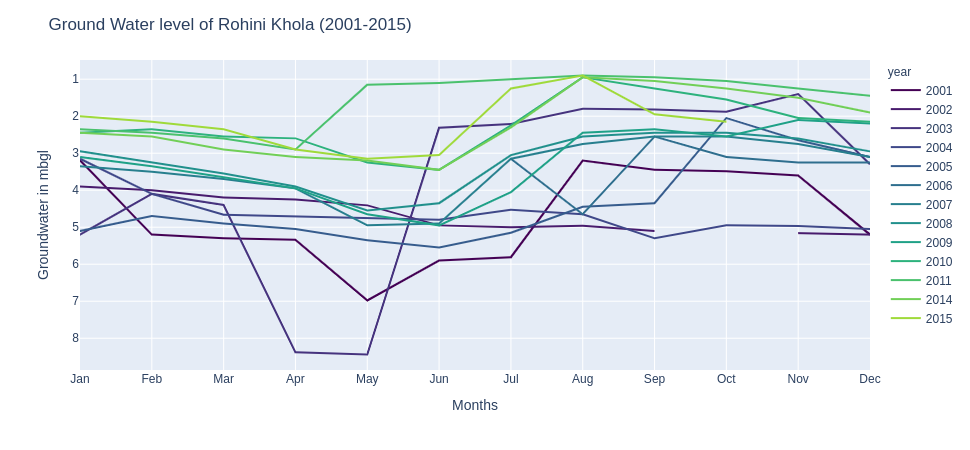

In [232]:
        # title =  title_wells[wells[0]]
        
x = ["#440154" ,"#481B6D" ,"#46337E", "#3F4889" ,"#365C8D", "#2E6E8E", "#277F8E",
             "#21908C", "#1FA187", "#2DB27D", "#4AC16D", "#71CF57", "#9FDA3A", "#CFE11C", "#FDE725"]

colors = {}
years_in_cols = data['year'].unique().tolist()
for i in range(len(years_in_cols)):
    colors = {i: j for i,j in zip(years_in_cols, x)}
            # print(colors)
fig = px.line(data, x= 'month',y = 'value', color = 'year', color_discrete_map= colors)
              
            # for d in fig['data']:
            #     print(d)
            #     d['line']['color']='grey'
            # fig = go.Figure(data=go.Scatter(x=data["month"], y=data['value'], color = data['year']), 
            # layout = go.Layout(margin = {'l':0, 't': 25, 'r' : 0, 'l' : 0}))
fig.update_layout(title=f'Ground Water level of {title} (2001-2015)',
                   xaxis_title='Months',
                   yaxis_title='Groundwater in mbgl',
                   yaxis_range=[-1,10]),
                   
fig.update_yaxes(autorange="reversed")
fig.show()